# Neural Networks


A neural network (NN) is a machine learning model that mimics the way biological neural networks in the human brain process information. These networks have various degrees of complexity, and are able to handle difficult problems, such as natural language processing and image recognition. A prototype of NN is shown in the following figure,

<img src="image/neural_networks.png" width="400"> 



The circles are called **neurons** (also called nodes), which are the basic units of the NN. They are arranged in layers and here there are three layers: the *input layer*: features are passed into this layer; the output layer: the predicted quantities (discrete or continuous) come from this layer; and the hidden layer: any layers between the input and output layers, main computations are performed in these layers. Each neuron in the hidden layer in this structure is *fully connected* (or *dense*) with the input neurons (i.e., connected with all the neurons in the previous layer). The arrows represent the connections, and a weight is associates with each connection. The value of each neuron in the hidden layer is a nonlinear function (called **activation function**) of the weighted sum (with a constant term called **bias**) of the values of the input neurons. The output layer follows a similar pattern. Some commonly ued activation functions are:

- Sigmoid: $\sigma(x) = \frac{1}{1+e^{-x}}$

- Rectified Linear Unit (ReLU): $\text{ReLU}(x) = \max(0,x)$

- hyperbolic tangent (Tanh): $\text{tanh}(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

Depending on the structure of the NN, it can be as simple as a linear model, or can have millions or more hyperparameters that take days to be trained. We start from the simplest versions of NN and gradually move to more complex ones in later chapters.

## The Perceptron

A perceptron has only an input layer and an output layer. As the figure shown below, we consider a perceptron with only one neuron in the output layer. The output neuron takes the weighted sum of the inputs ($w_1x_1+\cdots+w_mx_m+b$), and applies an activation function $\Gamma$, usually the *Heaviside step function*, to the weighted sum to generate an output $y$:

\begin{equation*}
y = \Gamma(w_1x_1+\cdots+w_mx_m+b)
\end{equation*}

where 

\begin{equation*}
\Gamma(x) = 
\begin{cases}
1 & \text{if } x\ge 1 \\
0 & \text{if } x\lt 1 
\end{cases}
\end{equation*}

<img src="image/perceptron.png" width="600"> 

If the activation function $\Gamma$ is taken to be the identity (linear activation) function $\Gamma(x)=x$, then perceptron is reduced to a linear model. Perceptron is mainly used for binary classification. Training a perceptron model involves finding the optimal weights and biases. The choice of the activation function also matters. The We now use an example to illustrate how to implement perceptron in Python. 

**Example 10-1**

Use perceptron for a random 2-class classification problem where the data are generated by sklearn.datasets.make_classification.

In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=50)

# Initialize and train the perceptron model
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=50)
per_clf.fit(X, y)

# Make predictions
y_pred = per_clf.predict(X)

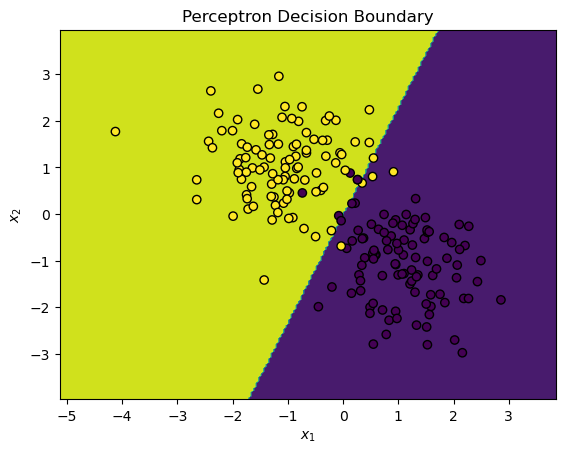

In [2]:
# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the mesh grid
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

# Add labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Perceptron Decision Boundary');

## Multilayer Perceptron (MLP)

If we add one or more hidden layers to the perceptron structure, we obtain a **multilayer perceptron** (see the first figure above). With a more complex structure, MLP is capable of solving more difficult problems for both classification and regression. When the number of hidden layers is large, the model is called a **deep neural network (DNN)**. Using DNNs to perform machine learning tasks is called **deep learning** (although there is no agreement on how many hidden layers is deep). The input layer takes the input features, each node of each hidden layer takes the weighted sum of the nodes from the previous layer and applies an activation function, and the output layer produces the output. There can be a single node in the output layer if the problem is a regression of binary classification. There can be more nodes for multi-class classification problems. For a multi-class classification problem, the activation function for the output layer is usually the **softa** function for a $K$-class classification problem is:

\begin{align*}
\Gamma(\boldsymbol{x}) = \Gamma(x_1, x_2, \dots, x_K) = \left(\frac{e^{x_1}}{\sum_{j=1}^K e^{x_j}}, \frac{e^{x_2}}{\sum_{j=1}^K e^{x_j}}, \dots, \frac{e^{x_K}}{\sum_{j=1}^K e^{x_j}}\right) \in (0, 1)^K
\end{align*}

The training of an MLP involves finding the optimal weights and biases based on a selected loss function. The MSE function is natural for regression, and cross-entropy is appropriate for classification. To find the best hyperparameters, initial values (guesses) of the hyperparameters need to be first provided. Then the input layer receives the input features, and each node in the hidden layer closest to the input layer receives the weighted sum of the input nodes and applies the activation function. The subsequent hidden layers and the output layer follow the same process, and finally an output is produced corresponding to the initial hyperparameter values, and the loss function is evaluated at the output. This stage is called **forward propagation**. The second stage involves a process that reverses the previous one, called **back propagation**. Here, the gradient of the loss function with respect to the hyperparameters (weights and biases) are computed. With the gradient information, an efficient optimization algorithm such as *stochastic gradient descent (SGD)* can be used to search for the optimal hyperparameters. The core of the training of MLP is the back propagation. We use examples to illustrate how it works.

**Example 10-2**

In the simple MLP for regression below, we have initialized all the weights and biases, and the input values for Nodes $I_1$ and $I_2$ are given. For both the hidden and output layers, suppose we use the sigmoid activation. Also assume the true target values are $0.01$ and $0.99$ for Nodes $O_1$ and $O_2$, respectively. Perform a forward pass and evaluate the value of the cost function.

<img src="image/backpropagation.png" width="800"> 

Calculate the weighted sum of the inputs $I_1$ and $I_2$ for $H_1$, called the **net input** of $H_1$:

\begin{align*}
\text{net}_{H_1} &= w_{1} \cdot i_{1}+w_{2} \cdot i_{2}+b_{1} \\
\text{net}_{H_1} &= 0.15 \cdot 0.05+0.2 \cdot 0.1+0.35=0.3775 \\
\end{align*}

Use the sigmoid function to get the output of $H_1$: 

\begin{equation*}
\text {out}_{H_1}=\frac{1}{1+e^{-\text{net}_{H_1}}}=\frac{1}{1+e^{-0.3775}}=0.593269992
\end{equation*} 

Carrying out the same process for $H_2$:

\begin{equation*}
\text{out}_{H_2}=0.596884378
\end{equation*}

Repeat this process for the nodes in the output layer, using the output
from the hidden layer nodes as inputs.

For the output of $O_1$, we have: 

\begin{align*}
\text{net}_{O_1}&=w_{5} \cdot \text{out}_{H_1}+w_{6} \cdot \text {out}_{H_2}+b_{3} \\
\text{net}_{O_1}&=0.4 \cdot 0.593269992+0.45 \cdot 0.596884378+0.6=1.105905967 \\
\text{out}_{O_1}&=\frac{1}{1+e^{-\text{net}_{O_1}}}=\frac{1}{1+e^{-1.105905967}}=0.75136507
\end{align*}

Similarly, for $O_2$ we get: 

\begin{equation*}
\text{out}_{O_2}=0.772928465
\end{equation*}

We can now calculate the error for each output node using the MSE function and sum them to get the total error: 

\begin{equation*}
E_{\text{total}}=\sum \frac{1}{2}(\text{target}-\text{output})^{2} = \frac{1}{2}(0.01-0.75136507)^{2} + \frac{1}{2}(0.99-0.772928465)^{2} = 0.298371109
\end{equation*}


**Example 10-3**

Now we perform the back propagation process.

Output layer: Consider $w_5$. We want to know how much a change in $w_5$ affects the total error, i.e.,
$\frac{\partial \text{E}_{\text{total}} }{\partial w_5}$. Applying
the chain rule, we know that 

\begin{equation*}
\frac{\partial E_{\text{total}}}{\partial w_{5}}=\frac{\partial E_{\text{total}}}{\partial \text{out}_{O_1}} \cdot \frac{\partial \text{out}_{O_1}}{\partial \text{net}_{O_1}} \cdot \frac{\partial \text{out}_{O_1}}{\partial w_{5}}
\end{equation*} 

We now find each piece in this equation:

\begin{align*}
E_{\text{total}}&=\frac{1}{2}\left(\text{target}_{o 1}-\text { out }_{o 1}\right)^{2}+\frac{1}{2}\left(\operatorname{target}_{o 2}-\text { out }_{o 2}\right)^{2} \\
\frac{\partial E_{\text{total}}}{\partial \text{out}_{O_1}}&=-\left(\text{target}_{O_1}-\text{out}_{O_1}\right)=-(0.01-0.75136507)=0.74136507
\end{align*}

\begin{equation*}
\begin{array}{l}
\text { out }_{o 1}=\frac{1}{1+e^{-n e t_{o 1}}} \\
\frac{\partial \text { out }_{o 1}}{\partial n e t_{o 1}}=\operatorname{out}_{o 1}\left(1-\text { out }_{o 1}\right)=0.75136507(1-0.75136507)=0.186815602
\end{array}
\end{equation*}

\begin{equation*}
\begin{array}{l}
\text { net }_{o 1}=w_{5} \cdot \text { out }_{h 1}+w_{6} \cdot \text { out }_{h 2}+b_{3} \\
\frac{\partial\text {net}_{O_1} }{\partial w_{5}}=\text { out }_{h 1}=0.593269992
\end{array}
\end{equation*}

Putting it all together: 

\begin{align*}
\frac{\partial E_{\text{total}}}{\partial w_{5}}&=\frac{\partial E_{\text{total}}}{\partial \text{out}_{O_1}} \cdot \frac{\partial \text{out}_{O_1}}{\partial \text{net}_{O_1}} \cdot \frac{\partial\text{net}_{O_1}}{\partial w_{5}} \\
\frac{\partial E_{\text{total}}}{\partial w_{5}}&=0.74136507 \cdot 0.186815602 \cdot 0.593269992=0.082167041
\end{align*}

Similarly, we can obtain
$\frac{\partial \text{E}_{\text{total}} }{\partial w_6}$,
$\frac{\partial \text{E}_{\text{total}} }{\partial w_7}$,
$\frac{\partial \text{E}_{\text{total}} }{\partial w_8}$.

Now we deal with the hidden layer. First we find $\frac{\partial \text{E}_{\text{total}} }{\partial w_1}$ by

\begin{equation*}
\frac{\partial E_{\text{total}}}{\partial w_{1}}=\frac{\partial E_{\text{total}}}{\partial \text{out}_{H_1}} \cdot \frac{\partial \text{out}_{H_1}}{\partial \text{net}_{H_1}} \cdot \frac{\partial \text{net}_{H_1}}{\partial w_{1}}
\end{equation*}

Note $\text{out}_{H_1}$ affects both $\text{out}_{O_1}$ and $\text{out}_{O_2}$. So 

\begin{equation*}
\frac{\partial E_{\text{total}}}{\partial \text{out}_{H_1}}=\frac{\partial E_{O_1}}{\partial \text{out}_{H_1}}+\frac{\partial E_{O_2}}{\partial \text{out}_{H_1}}
\end{equation*} 
and 

\begin{equation*}
\frac{\partial E_{O_1}}{\partial \text {out}_{H_1}}=\frac{\partial E_{O_1}}{\partial \text{net}_{O_1}} \cdot \frac{\partial \text{net}_{O_1}}{\partial \text{out}_{H_1}} = \frac{\partial E_{O_1}}{\partial \text{out}_{O_1}} \cdot \frac{\partial \text {out}_{O_1}}{\partial \text{net}_{O_1}}\cdot \frac{\partial \text{net}_{O_1}}{\partial \text{out}_{H_1}} = 0.74136507\cdot 0.186815602 \cdot w_5 = 0.055399425
\end{equation*} 

Similarly, all the other quantities can be obtained. Once all the partial derivatives are obtained, SGD or other derivative-based optimization algorithm can be applied.

**Example 10-4**

We perform MLP for the iris data set. Here we use two hidden layers, each with $10$ neurons.

Confusion Matrix:
 [[20  0  0]
 [ 0 14  0]
 [ 0  0 11]]


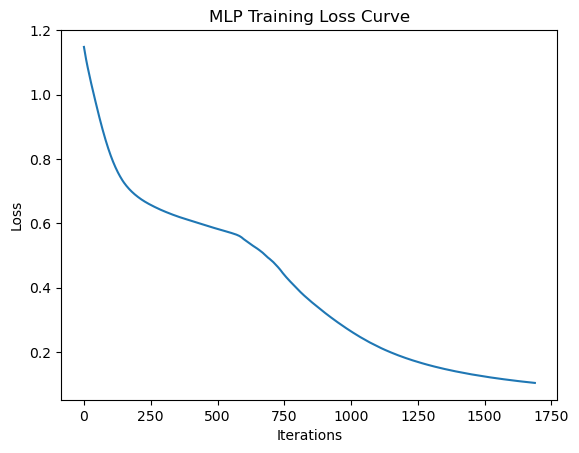

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=96)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(12, 6), max_iter=5000, random_state=86)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the loss curve. The loss function continues to drop as the model is being trained
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss');

We can check the optimal weights and biases of the model by:

In [32]:
# See the weight matrix
mlp.coefs_

[array([[-0.38639999, -0.47921984, -0.85369411, -0.09692643, -0.10745231,
          0.6204933 , -0.21007314, -0.42818818,  0.96059093, -0.33130668,
         -0.53353584,  0.34266489],
        [ 0.46759207,  0.43518618,  0.67255324, -0.64774433, -0.4716051 ,
         -0.47048044, -0.29232437,  0.65049607, -0.56107454,  0.57628054,
          0.43831958,  0.02490162],
        [-0.28121689, -0.19595681, -0.89872946,  1.24731719,  0.53192312,
         -1.76467841,  0.77030492, -0.27495727, -0.99168277, -0.79445805,
         -0.38833726, -0.01354722],
        [ 0.33654925,  0.20413659, -0.0604337 ,  0.53313068,  0.5098916 ,
         -0.95091831,  1.26242908, -0.5976721 ,  0.17004848, -0.59130148,
         -0.80525132,  0.21632437]]),
 array([[-5.22115239e-01, -1.01460772e-05,  6.63854561e-01,
         -5.58638660e-01, -1.17290631e-01, -2.67314255e-01],
        [-1.70766217e-01,  3.03615582e-06,  5.79073512e-01,
         -4.28465918e-02,  4.48677979e-01, -3.98988864e-01],
        [ 3.98023541

The first weight matrix is $4\times 12$, since we have four input neurons and $12$ neurons in the first hidden layer. For example, the first row represents the weight from the first neuron of the input layer to all $12$ neurons in the first hidden layer. For the biases, simply call:

In [33]:
# Bias:
mlp.intercepts_

[array([ 1.064518  ,  1.00025039, -0.1233446 , -0.28436637,  1.38207967,
         0.95564239, -0.32248468,  0.68590364,  0.24189182,  0.01015541,
         0.90629805,  0.16900112]),
 array([ 0.30398812, -0.26807586,  0.58656479, -0.24204741, -0.25822549,
        -0.56513263]),
 array([-1.71106822, -0.53736298,  1.27126756])]

For example, the first array of $12$ elements represents the bias for the $12$ neurons in the first hidden layer.

**Example 10-5**

Apply MLP to the california housing dataset. Use two hidden layers each with $50$ neurons.

Mean Squared Error: 0.26
R^2 Score: 0.80


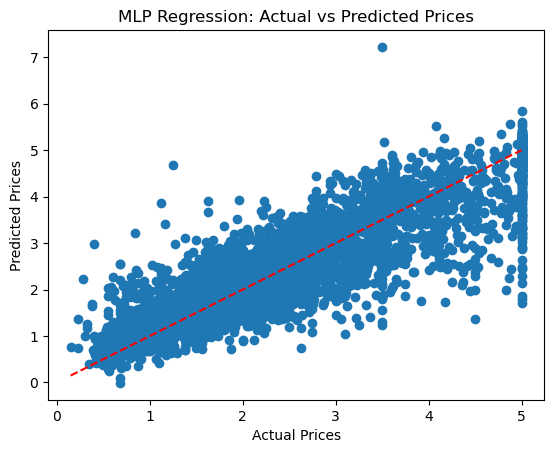

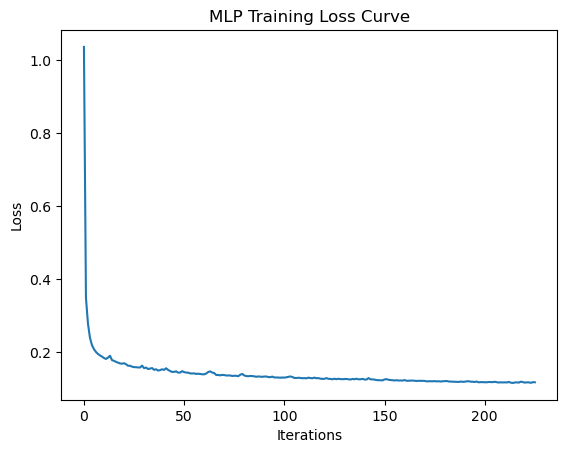

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=77)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('MLP Regression: Actual vs Predicted Prices')
plt.show()

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()